In [1]:
cd ..


E:\win_profiles\pwinant\Programming\papers\finint


In [2]:
from numpy import *

In [3]:
from dolo import *

In [4]:
from tasks import *

In [5]:
scenario = 'normal'
calib = 'riskfree_10_10_10_psi05'
calib = 'baseline_50_50_50_ez'
# calib = 'riskfre'


In [67]:
scenario = 'long_run'
calib = 'baseline_ez'
# calib = 'long_run_95_002'

In [68]:
ls results/

Invalid switch - "".


In [69]:
import shelve
drs = []
for case in ['A','B','C']:
    print(case)

    sh = shelve.open('results/{}_{}'.format(scenario, case))
    print(sh.keys())

    dr = sh[calib]
    drs.append(dr)
    sh.close()
    

A
['long_run_001', 'long_run_95_002', 'baseline_ez', 'long_run_002', 'long_run_95_001']
B
['long_run_001', 'long_run_95_002', 'baseline_ez', 'long_run_002', 'long_run_95_001']
C
['long_run_001', 'long_run_95_002', 'baseline_ez', 'long_run_002', 'long_run_95_001']


In [70]:
model_B = yaml_import("models/integration_B.yaml")
model_A = yaml_import("models/integration_A.yaml")
model_C = yaml_import('models/integration_C.yaml')

Model type detected as mfga
Model type detected as mfga
Model type detected as mfga


In [71]:
for m in [model_A, model_B, model_C]:
    m.set_calibration(**drs[0]['calibration_dict'])

In [72]:
model_B.get_calibration('psi')

0.5

In [73]:
s0_B = model_B.calibration['states']

In [74]:
i_0 = (drs[1]['solution'].n_m // 2)

In [75]:
ddr = [s['solution'] for s in drs]
ddv = [s['values'] for s in drs]

In [76]:
model_A.symbols['controls']

['i_1', 'i_2', 'ew_1', 'ew_2', 'w_1', 'w_2']

In [77]:
model_B.symbols['controls']

['db_f', 'p_f', 'i_1', 'i_2', 'ew_1', 'ew_2', 'w_1', 'w_2']

In [95]:
def welf_gain(xi):
    from numpy import array, row_stack
    s0 = s0_B.copy()
    s0[1] = xi
    s_A = s0[:2]
    s_B = s0
    s_C = s0[:2]
    W_A = ddr[0](i_0, s_A)[4:6]
    W_B = ddr[1](i_0, s_B)[6:8]
    x_C = ddr[2](i_0, s_C)
    v_C = ddv[2](i_0, s_C)
    W = x_C[3]
    sh = v_C[6]/(v_C[6]+v_C[7])
    W_C = array( [sh*W, (1-sh)*W] )
    
#     gains = concatenate([a[:,None] for a in ([(W_B/W_A-1)*100])], axis=1)
    gains = concatenate([a[:,None] for a in ([(W_B/W_A-1)*100, (W_C/W_A-1)*100])], axis=1)
    return gains

In [79]:
welf_gain(0.5)

[ 1.18607567  1.06883141]


array([[ 0.12264731,  1.20602028],
       [ 0.06973528,  1.25451039]])

In [80]:
from numpy import linspace, column_stack, row_stack, concatenate
from matplotlib.pyplot import *
%matplotlib inline

In [81]:
model_B.options

{'approximation_space': {'a': [2, 0.5, -5.0],
  'b': [10, 1.25, 5.0],
  'orders': [30, 30, 30]}}

In [82]:
xivec = linspace(0.5, 1.25)
welf = concatenate([welf_gain(xi)[:,:,None] for xi in xivec], axis=2)

[ 1.18607567  1.06883141]
[ 1.18601757  1.0720697 ]
[ 1.18596463  1.07526991]
[ 1.18591426  1.07841751]
[ 1.1858671   1.08152027]
[ 1.18582328  1.08458203]
[ 1.18578237  1.08760263]
[ 1.18574421  1.09058367]
[ 1.18570872  1.09352698]
[ 1.18567575  1.09643384]
[ 1.18564516  1.09930546]
[ 1.18561684  1.1021431 ]
[ 1.18559069  1.1049479 ]
[ 1.1855666   1.10772093]
[ 1.18554447  1.11046323]
[ 1.18552421  1.11317574]
[ 1.18550573  1.11585939]
[ 1.18548897  1.11851505]
[ 1.18547383  1.12114354]
[ 1.18546026  1.12374565]
[ 1.18544817  1.12632212]
[ 1.18543752  1.12887367]
[ 1.18542823  1.13140098]
[ 1.18542025  1.1339047 ]
[ 1.18541353  1.13638544]
[ 1.18540802  1.13884379]
[ 1.18540366  1.14128033]
[ 1.18540041  1.1436956 ]
[ 1.18539823  1.14609012]
[ 1.18539707  1.14846439]
[ 1.1853969   1.15081888]
[ 1.18539767  1.15315406]
[ 1.18539935  1.15547038]
[ 1.18540191  1.15776825]
[ 1.18540531  1.16004808]
[ 1.18540952  1.16231028]
[ 1.18541452  1.16455522]
[ 1.18542026  1.16678327]
[ 1.18542673

In [83]:
welf.shape

(2L, 2L, 50L)

In [84]:
xivec

array([ 0.5       ,  0.51530612,  0.53061224,  0.54591837,  0.56122449,
        0.57653061,  0.59183673,  0.60714286,  0.62244898,  0.6377551 ,
        0.65306122,  0.66836735,  0.68367347,  0.69897959,  0.71428571,
        0.72959184,  0.74489796,  0.76020408,  0.7755102 ,  0.79081633,
        0.80612245,  0.82142857,  0.83673469,  0.85204082,  0.86734694,
        0.88265306,  0.89795918,  0.91326531,  0.92857143,  0.94387755,
        0.95918367,  0.9744898 ,  0.98979592,  1.00510204,  1.02040816,
        1.03571429,  1.05102041,  1.06632653,  1.08163265,  1.09693878,
        1.1122449 ,  1.12755102,  1.14285714,  1.15816327,  1.17346939,
        1.18877551,  1.20408163,  1.21938776,  1.23469388,  1.25      ])

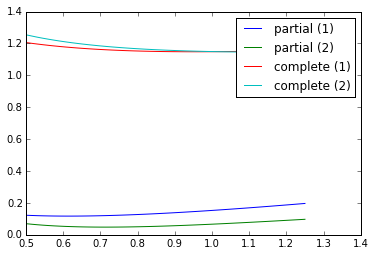

In [85]:
plot(xivec, welf[0,0,:], label='partial (1)')
plot(xivec, welf[1,0,:], label='partial (2)')
plot(xivec, welf[0,1,:], label='complete (1)')
plot(xivec, welf[1,1,:], label='complete (2)')
x1,x2 = xlim()
hlines(0,x1,x2,linestyle='--')
legend()

In [86]:
ddr[0].smax

array([ 10.  ,   1.25])

In [87]:
ls -ll results/

Invalid switch - "".


In [88]:
sh = shelve.open('results/normal_A')

In [89]:
sh.keys()

['baseline_10_10_10_psi_1_ez',
 'baseline_30_30_30_ez_high_gamma',
 'baseline_30_30_30_ez_low_gamma',
 'baseline_10_10_10_ez_nobound',
 'baseline_10_10_10_ez',
 'baseline_10_10_10_psi_2_ez',
 'baseline_10_10_10',
 'baseline_30_30_30_ez',
 'baseline_30_30_30_very_low_constraint',
 'baseline_30_30_30',
 'baseline_50_50_50_ez',
 'baseline_50_50_50',
 'riskfree_10_10_10_psi05']

In [90]:

sh.close()

In [91]:
ls results

 Volume in drive E is Data
 Volume Serial Number is F23B-BA46

 Directory of E:\win_profiles\pwinant\Programming\papers\finint\results

12/08/2014  05:25 PM    <DIR>          .
12/08/2014  05:25 PM    <DIR>          ..
12/08/2014  06:17 PM       197,211,640 all_simulations_long_run.pickle
12/08/2014  05:32 PM       493,109,279 all_simulations_normal.pickle
11/01/2014  04:49 AM       975,167,488 long_run
11/26/2014  02:47 PM        53,927,936 long_run_A
11/25/2014  09:03 PM     1,690,247,168 long_run_B
12/02/2014  05:55 PM        45,219,840 long_run_C
12/08/2014  03:19 PM        60,514,304 normal_A
12/08/2014  03:07 PM     2,460,745,728 normal_B
12/08/2014  03:58 PM        50,921,472 normal_C
               9 File(s)  6,027,064,855 bytes
               2 Dir(s)  1,533,717,868,544 bytes free


In [92]:
!cat results/normal_C.dir

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [93]:
model_B = yaml_import("models/integration_B.yaml")
dr = ddr[1]

Model type detected as mfga


In [94]:
sim = simulate(model_B, dr, 0, n_exp=100, horizon=200)

(200, 100, 24)


KeyError: 100

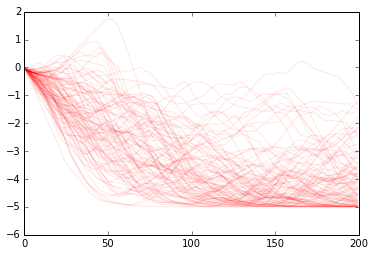

In [30]:
for i in range(200):
    plot(sim[i]['db_f'], color='red', alpha=0.1)

In [166]:
for i in

SyntaxError: invalid syntax (<ipython-input-166-cf8fd3ebf9ea>, line 1)

In [167]:
plot(sim['db_f'])

KeyError: 'db_f'

# test with perturbations


In [54]:
model_A = yaml_import("models/integration_pert_A.yaml")
model_B = yaml_import("models/integration_pert_B.yaml")

Model type detected as fga
Model type detected as fga


In [94]:
dr_A = approximate_controls(model_A, order=2)
dr_B = approximate_controls(model_B, eigmax=1.0001, order=2)

There are 14 eigenvalues greater than 1. Expected: 14.
There are 14 eigenvalues greater than 1. Expected: 14.


In [95]:
model_A.symbols['states']

['A_1', 'A_2', 'E', 'k_1', 'sparsity']

In [96]:
def welfare(scar=1.0):
    s_A = model_A.calibration['states'].copy()
    s_A[4] = scar
    x_A = dr_A(s_A)
    s_B = model_B.calibration['states'].copy()
    s_B[4] = scar
    x_B = dr_B(s_B)
    W_A = x_A[6:8]
    W_B = x_B[6:8]
    gains = (W_B/W_A - 1)*100
    return gains

In [97]:
xivec = linspace(0.5, 1.25)
all_gains = concatenate([welfare(i)[None,:] for i in xivec],axis=0)

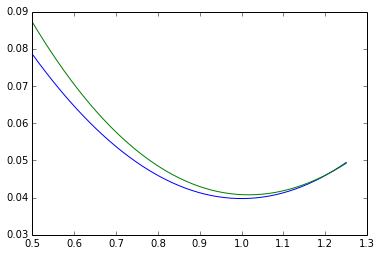

In [98]:
plot(xivec, all_gains[:,0])
plot(xivec, all_gains[:,1])

# Try




In [116]:
model_A = yaml_import("models/integration_A.yaml")
model_B = yaml_import("models/integration_B.yaml")

Model type detected as mfga
Model type detected as mfga


In [105]:
from dolo.algos.mfg.simulations import plot_decision_rule

In [108]:
dr = drs[1]['solution']

In [113]:
model_B.symbols

OrderedDict([('states', ['A_1', 'A_2', 'E', 'k_1', 'sparsity', 'b_f']), ('controls', ['db_f', 'p_f', 'i_1', 'i_2', 'ew_1', 'ew_2', 'w_1', 'w_2', 'roc_1', 'roc_2', 'p_S_1', 'p_S_2', 'r_S_1', 'r_S_2']), ('auxiliaries', ['k_2', 'y_1', 'y_2', 'c_1', 'c_2', 'Phi_1', 'Phi_2', 'Phi_1__p', 'Phi_2__p']), ('shocks', ['e_A_1', 'e_A_2', 'e_E']), ('parameters', ['beta', 'theta', 'gamma', 'psi', 'delta', 'rho_A', 'rho_E', 'min_b', 'max_b', 'a1', 'a2', 'xi', 'sigma_A_1', 'sigma_A_2', 'sigma_E', 'kmin', 'kmax', 'min_bb', 'max_bb', 'spmin', 'spmax', 'country', 'zeta'])])

In [112]:
plot_decision_rule?

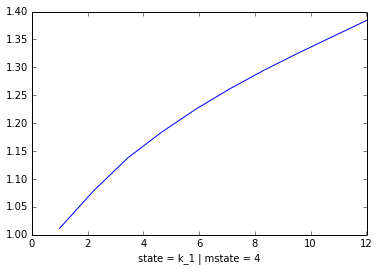

In [121]:
plot_decision_rule(model_B, dr,'k_1', plot_controls='w_2', bounds=[1, 12])

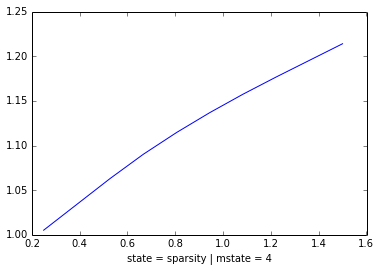

In [120]:
plot_decision_rule(model_B, dr,'sparsity', plot_controls='w_2', bounds=[0.25, 1.5])